In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import cv2
import os
import PIL
import random
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
#Source: https://github.com/laboroai/LaboroTomato
#url = 'https://drive.google.com/file/d/1qAZMDHw1AWuEQ9jYmVqPpR_bIqLOXo_g/view?usp=sharing'
directory = "D:\devProjects\cv_tom_opt\datasets"
PATH = os.path.join(os.path.dirname(directory), 'datasets')
data_path = pathlib.Path(PATH)
data_path

WindowsPath('D:/devProjects/cv_tom_opt/datasets')

In [22]:
image_count = len(list(data_path.glob('*/*.jpg')))
image_count

615

In [23]:
ripe_tom = list(data_path.glob('ripe/*.jpg'))
ripe_tom[:5]

[WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_1.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_10.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_100.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_101.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_102.jpg')]

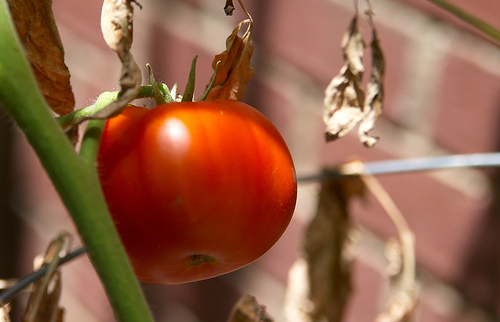

In [29]:
ripe_tom = list(data_path.glob('ripe/*.jpg'))
PIL.Image.open(str(ripe_tom[5]))

In [24]:
unripe_tom = list(data_path.glob('unripe/*.jpg'))
unripe_tom[:5]

[WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_1.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_10.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_100.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_101.jpg'),
 WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_102.jpg')]

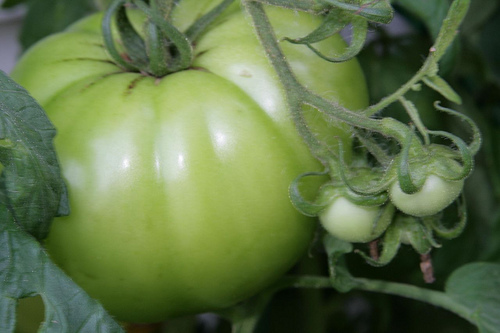

In [30]:
unripe_tom = list(data_path.glob('unripe/*.jpg'))
PIL.Image.open(str(unripe_tom[5]))

In [32]:
tom_dic = {
    'ripe' : list(data_path.glob('ripe/*.jpg')),
    'unripe' : list(data_path.glob('unripe/*.jpg')),
}

In [40]:
print('ripe path')
print(tom_dic['ripe'][:3])
print('unripe path')
print(tom_dic['unripe'][:3])

ripe path
[WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_1.jpg'), WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_10.jpg'), WindowsPath('D:/devProjects/cv_tom_opt/datasets/ripe/ripe_100.jpg')]
unripe path
[WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_1.jpg'), WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_10.jpg'), WindowsPath('D:/devProjects/cv_tom_opt/datasets/unripe/unripe_100.jpg')]


In [41]:
label_dic = {
    'ripe' : 0,
    'unripe' : 1,
}

In [43]:
X, y = [], []

for tom_name, images in tom_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img, (180,180))
        X.append(resize_img)
        y.append(label_dic[tom_name])

In [45]:
X[0].shape

(180, 180, 3)

In [46]:
y[0]

0

In [47]:
X = np.array(X)
y = np.array(y)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [55]:
print('X_train Samples=', len(X_train))
print('X_test Samples=', len(X_test))
print('y_train Samples=', len(y_train))
print('y_test  Samples=', len(y_test))

X_train Samples= 461
X_test Samples= 154
y_train Samples= 461
y_test  Samples= 154


In [59]:
X_train_scale = X_train / 255
X_test_scale = X_test / 255

In [60]:
num_classes = 2

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
])

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scale, y_train, epochs=30)

Epoch 1/30
15/15 [==============================] - 9s 543ms/step - loss: 0.9652 - accuracy: 0.6030
Epoch 2/30
15/15 [==============================] - 7s 459ms/step - loss: 0.4469 - accuracy: 0.8048
Epoch 3/30
15/15 [==============================] - 7s 486ms/step - loss: 0.3775 - accuracy: 0.8308
Epoch 4/30
15/15 [==============================] - 8s 508ms/step - loss: 0.3199 - accuracy: 0.8698
Epoch 5/30
15/15 [==============================] - 7s 497ms/step - loss: 0.2986 - accuracy: 0.8742
Epoch 6/30
15/15 [==============================] - 8s 502ms/step - loss: 0.3123 - accuracy: 0.8590
Epoch 7/30
15/15 [==============================] - 8s 513ms/step - loss: 0.2528 - accuracy: 0.9002
Epoch 8/30
15/15 [==============================] - 8s 498ms/step - loss: 0.2094 - accuracy: 0.9111
Epoch 9/30
15/15 [==============================] - 8s 560ms/step - loss: 0.1587 - accuracy: 0.9414
Epoch 10/30
15/15 [==============================] - 8s 513ms/step - loss: 0.1688 - accuracy: 0.9349

In [63]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 1s 139ms/step - loss: 222.8799 - accuracy: 0.7857


[222.87985229492188, 0.7857142686843872]

In [65]:
augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(
        "horizontal",
        input_shape=(180, 180, 3)
    ),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.9),
])

In [68]:
num_classes = 2

model = Sequential([
    augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    
    layers.Dropout(0.2),
    layers.Flatten(),
    
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
])

In [69]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scale, y_train, epochs=30)

Epoch 1/30
15/15 [==============================] - 13s 694ms/step - loss: 0.9273 - accuracy: 0.5770
Epoch 2/30
15/15 [==============================] - 9s 612ms/step - loss: 0.4556 - accuracy: 0.7918
Epoch 3/30
15/15 [==============================] - 9s 598ms/step - loss: 0.3341 - accuracy: 0.8416
Epoch 4/30
15/15 [==============================] - 9s 597ms/step - loss: 0.3117 - accuracy: 0.8742
Epoch 5/30
15/15 [==============================] - 9s 595ms/step - loss: 0.3129 - accuracy: 0.8525
Epoch 6/30
15/15 [==============================] - 9s 619ms/step - loss: 0.2779 - accuracy: 0.8785
Epoch 7/30
15/15 [==============================] - 9s 616ms/step - loss: 0.2682 - accuracy: 0.8850
Epoch 8/30
15/15 [==============================] - 9s 594ms/step - loss: 0.2663 - accuracy: 0.8764
Epoch 9/30
15/15 [==============================] - 9s 605ms/step - loss: 0.2842 - accuracy: 0.8720
Epoch 10/30
15/15 [==============================] - 10s 641ms/step - loss: 0.2992 - accuracy: 0.87

In [ ]:
model.evaluate(X_train_scale, y_train, epochs=30)